In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('COMP1801_Coursework_Dataset.csv')

# Display basic dataset information
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die


In [3]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 125.1+ KB


In [4]:
# Check for any missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Exploratory Data Analysis
print("\nDescriptive Statistics:")
display(df.describe())


Missing Values:
Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
HeatTreatTime     0
Nickel%           0
Iron%             0
Cobalt%           0
Chromium%         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64

Descriptive Statistics:


,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000


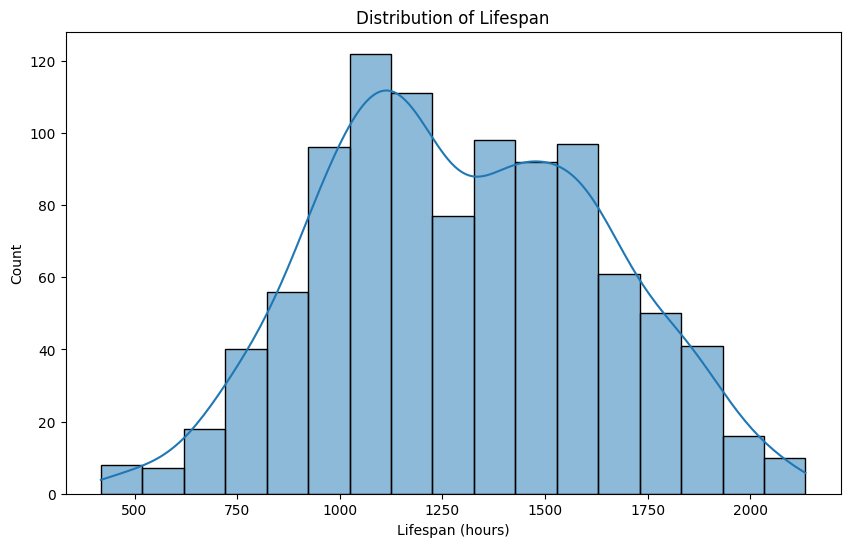

In [5]:
# Visualize relationships for key features
plt.figure(figsize=(10, 6))
sns.histplot(df['Lifespan'], kde=True)
plt.title("Distribution of Lifespan")
plt.xlabel("Lifespan (hours)")
plt.show()

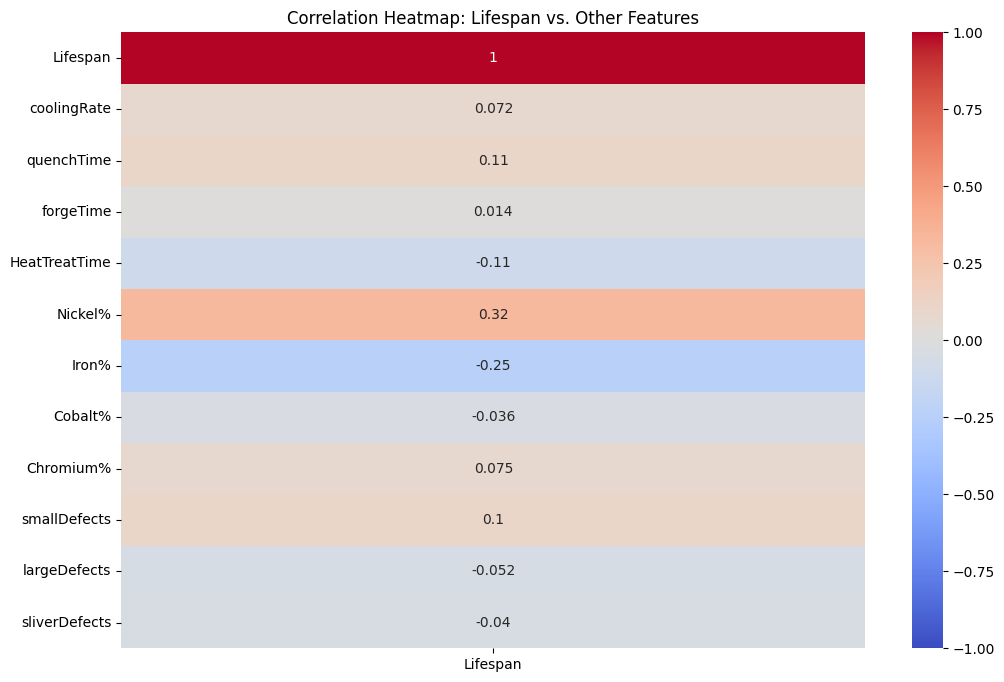

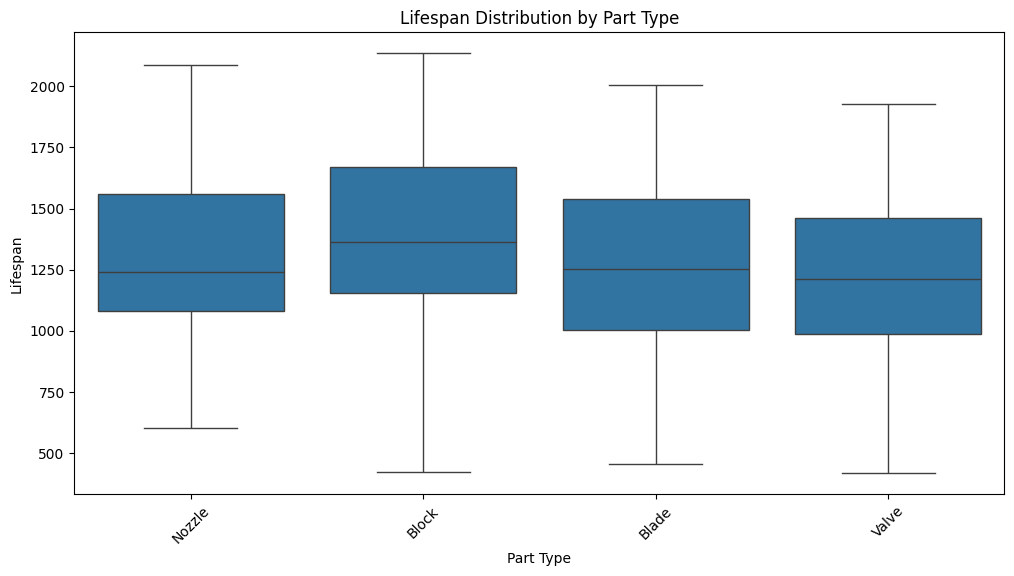

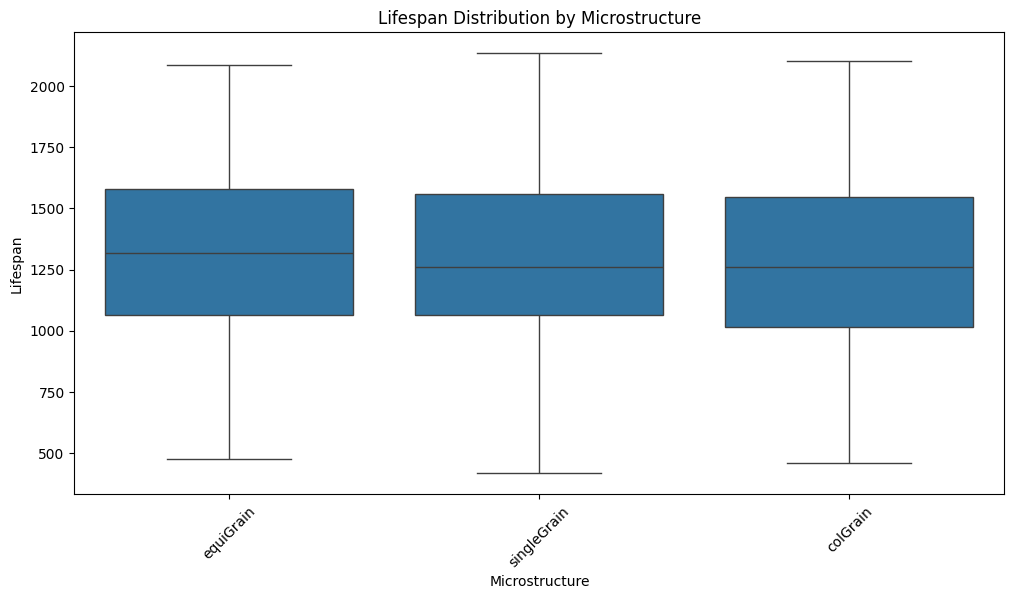

In [6]:
# 1. Correlation Heatmap
# Create a copy of the DataFrame to analyze numeric features only
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlations with lifespan
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
# Create a heatmap
sns.heatmap(correlation_matrix[['Lifespan']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Lifespan vs. Other Features')
plt.show()

# 2. Boxplots for Categorical Features
# Boxplot for partType
plt.figure(figsize=(12, 6))
sns.boxplot(x='partType', y='Lifespan', data=df)
plt.title('Lifespan Distribution by Part Type')
plt.xlabel('Part Type')
plt.ylabel('Lifespan')
plt.xticks(rotation=45)
plt.show()

# Boxplot for microstructure
plt.figure(figsize=(12, 6))
sns.boxplot(x='microstructure', y='Lifespan', data=df)
plt.title('Lifespan Distribution by Microstructure')
plt.xlabel('Microstructure')
plt.ylabel('Lifespan')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Define columns for transformations
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']
numerical_features = ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the data into features and target
X = df.drop(columns='Lifespan')
y = df['Lifespan']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Regression Implementation
from sklearn.preprocessing import PolynomialFeatures
# Expanding the preprocessing pipeline to include polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('scaler', StandardScaler()), ('poly', poly)]), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Update Ridge Regression with expanded alpha range
ridge_pipeline_poly = Pipeline(steps=[('preprocessor', preprocessor_poly),
                                      ('model', Ridge())])

# Define an extended hyperparameter grid for Ridge
param_grid_ridge_poly = {'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search_ridge_poly = GridSearchCV(ridge_pipeline_poly, param_grid=param_grid_ridge_poly, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge_poly.fit(X_train, y_train)

# Get the best Ridge model with polynomial features
best_ridge_poly_model = grid_search_ridge_poly.best_estimator_

# Predictions and Evaluation for Ridge Regression with Polynomial Features
y_pred_ridge_poly = best_ridge_poly_model.predict(X_test)
mae_ridge_poly = mean_absolute_error(y_test, y_pred_ridge_poly)
mse_ridge_poly = mean_squared_error(y_test, y_pred_ridge_poly)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)

print("\nRidge Regression with Polynomial Features Performance:")
print(f"Mean Absolute Error: {mae_ridge_poly}")
print(f"Mean Squared Error: {mse_ridge_poly}")
print(f"R-squared: {r2_ridge_poly}")


Ridge Regression with Polynomial Features Performance:
Mean Absolute Error: 126.1382889778525
Mean Squared Error: 23530.939281931292
R-squared: 0.7727770406447699


In [9]:
## Random Forest Regressor with Hyperparameter Tuning
rf_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', RandomForestRegressor(random_state=42))])

# Define hyperparameter grid for Random Forest Regressor
param_grid_rf = {'model__n_estimators': [100, 200],
                 'model__max_depth': [10, 20, None]}
grid_search_rf = GridSearchCV(rf_reg_pipeline, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_

# Predictions and Evaluation for Random Forest Regressor
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


Random Forest Regressor Performance:
Mean Absolute Error: 66.46939325000002
Mean Squared Error: 7044.252667234462
R-squared: 0.9319782385939837


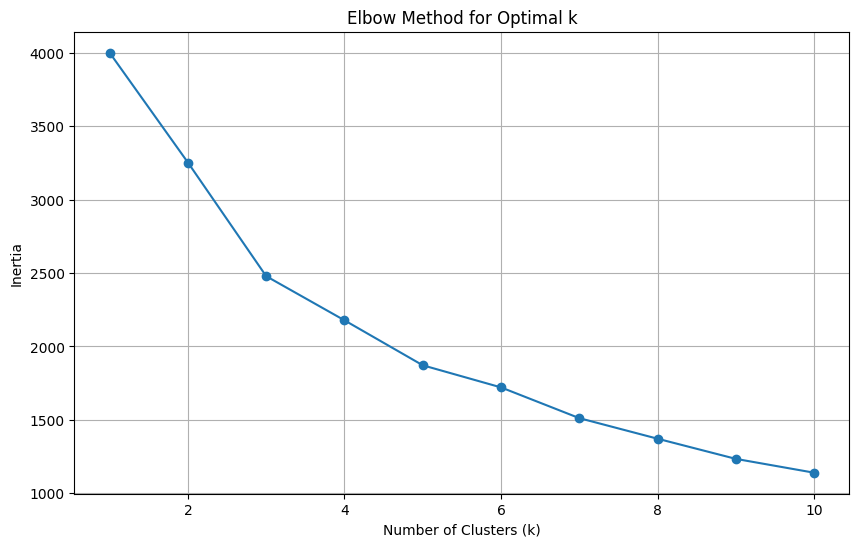

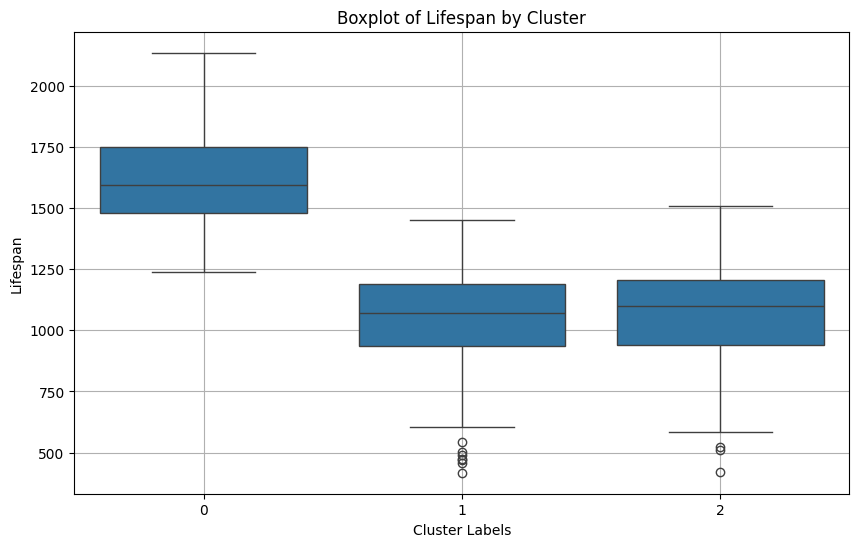

In [10]:
from sklearn.cluster import KMeans
# 1. Create binary output label based on lifespan threshold of 1500 hours
df['1500_labels'] = (df['Lifespan'] > 1500).astype(int)

# 2. Use K-Means Clustering to create additional groups based on features
# Selecting features for clustering
features_for_clustering = df[['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime']]  # Include relevant features

# Standardizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine optimal number of clusters using the Elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Based on the elbow curve, let's say we choose k=3 for demonstration
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster_labels'] = kmeans.fit_predict(scaled_features)

# 3. Analyze the cluster results
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_labels', y='Lifespan', data=df)
plt.title('Boxplot of Lifespan by Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Lifespan')
plt.grid()
plt.show()

In [11]:
# Classification Implementation

# Splitting the data into features and target for classification
X_class = df.drop(columns=['Lifespan', '1500_labels', 'cluster_labels'])
y_class = df['1500_labels']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Preprocessing pipeline for classification
numerical_features = X_class.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_class.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Logistic Regression Model for Classification
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', LogisticRegression(max_iter=1000))])

# Train Logistic Regression model
log_reg_pipeline.fit(X_train_class, y_train_class)

# Predictions and Evaluation for Logistic Regression
y_pred_log = log_reg_pipeline.predict(X_test_class)
acc_log = accuracy_score(y_test_class, y_pred_log)
prec_log = precision_score(y_test_class, y_pred_log)
rec_log = recall_score(y_test_class, y_pred_log)
f1_log = f1_score(y_test_class, y_pred_log)

print("\nLogistic Regression Classification Performance:")
print(f"Accuracy: {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall: {rec_log:.4f}")
print(f"F1 Score: {f1_log:.4f}")


Logistic Regression Classification Performance:
Accuracy: 0.7550
Precision: 0.6000
Recall: 0.3273
F1 Score: 0.4235


In [12]:
# Random Forest Classifier for Classification
rf_class_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', RandomForestClassifier(random_state=42))])

# Hyperparameter tuning for Random Forest Classifier
param_grid_rf_class = {'model__n_estimators': [100, 200],
                       'model__max_depth': [10, 20, None]}
grid_search_rf_class = GridSearchCV(rf_class_pipeline, param_grid=param_grid_rf_class, cv=5, scoring='accuracy')
grid_search_rf_class.fit(X_train_class, y_train_class)

best_rf_class_model = grid_search_rf_class.best_estimator_

# Predictions and Evaluation for Random Forest Classifier
y_pred_rf_class = best_rf_class_model.predict(X_test_class)
acc_rf_class = accuracy_score(y_test_class, y_pred_rf_class)
prec_rf_class = precision_score(y_test_class, y_pred_rf_class)
rec_rf_class = recall_score(y_test_class, y_pred_rf_class)
f1_rf_class = f1_score(y_test_class, y_pred_rf_class)

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {acc_rf_class:.4f}")
print(f"Precision: {prec_rf_class:.4f}")
print(f"Recall: {rec_rf_class:.4f}")
print(f"F1 Score: {f1_rf_class:.4f}")


Random Forest Classifier Performance:
Accuracy: 0.9300
Precision: 0.9362
Recall: 0.8000
F1 Score: 0.8627


In [13]:
# Conclusions
print("\n--- Conclusion ---")
if r2_rf > r2_ridge_poly:
    print("Recommendation: Use Random Forest Regressor for predicting lifespan as it has better performance metrics.")
else:
    print("Recommendation: Use Ridge Regression for predicting lifespan.")

if acc_rf_class > acc_log:
    print("Recommendation: Use Random Forest Classifier for defect classification as it has higher accuracy and F1 score.")
else:
    print("Recommendation: Use Logistic Regression for defect classification.")


--- Conclusion ---
Recommendation: Use Random Forest Regressor for predicting lifespan as it has better performance metrics.
Recommendation: Use Random Forest Classifier for defect classification as it has higher accuracy and F1 score.


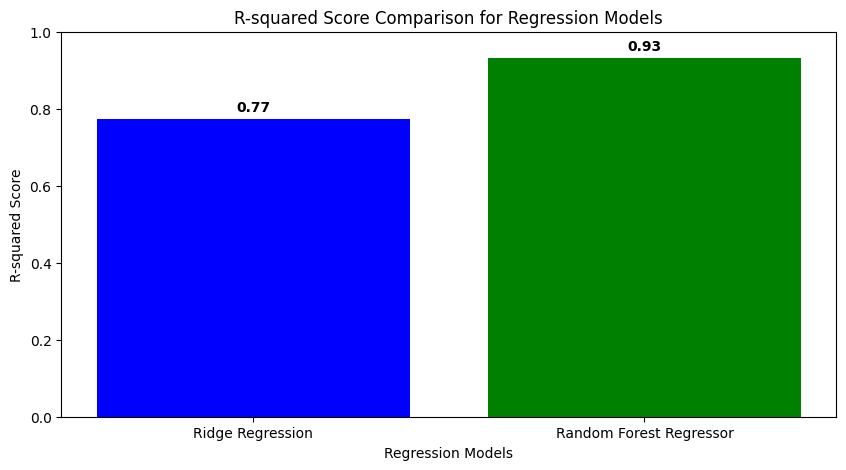

In [14]:
# Regression Performance Comparison
regression_models = ['Ridge Regression', 'Random Forest Regressor']
r2_scores = [r2_ridge_poly, r2_rf]

plt.figure(figsize=(10, 5))
plt.bar(regression_models, r2_scores, color=['blue', 'green'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison for Regression Models')
plt.ylim(0, 1)  # R-squared scores are generally between 0 and 1
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

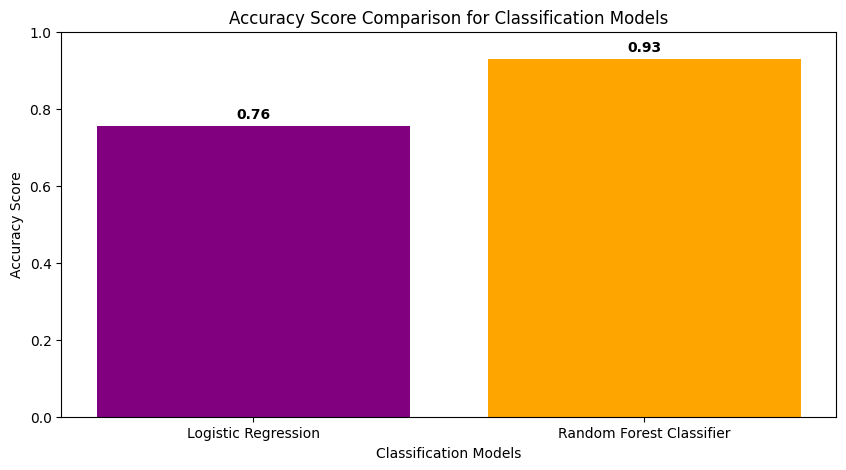

In [15]:
# Classification Performance Comparison
classification_models = ['Logistic Regression', 'Random Forest Classifier']
accuracy_scores = [acc_log, acc_rf_class]

plt.figure(figsize=(10, 5))
plt.bar(classification_models, accuracy_scores, color=['purple', 'orange'])
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Classification Models')
plt.ylim(0, 1)  # Accuracy scores are also between 0 and 1
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()